In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
suv_data = pd.read_csv("suv.csv")
suv_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

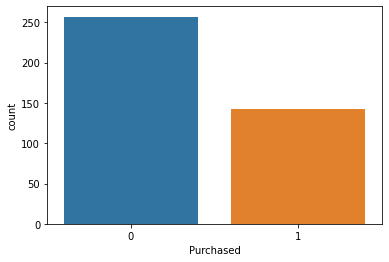

In [5]:
sns.countplot(x="Purchased", data=suv_data)

In [6]:
len(suv_data)

400

<AxesSubplot:xlabel='Purchased', ylabel='count'>

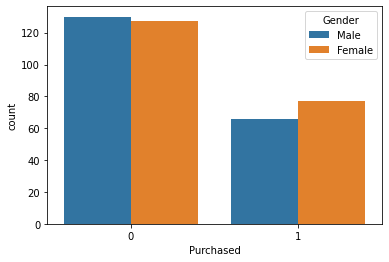

In [7]:
sns.countplot(x="Purchased", hue="Gender", data=suv_data)

<AxesSubplot:ylabel='Frequency'>

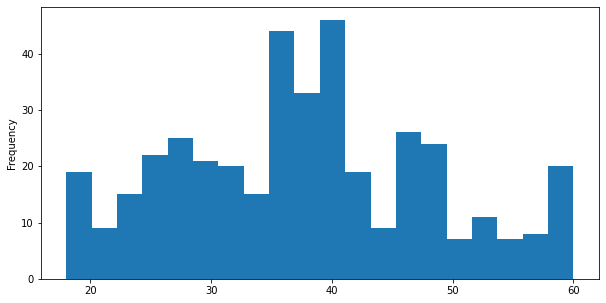

In [8]:
suv_data["Age"].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

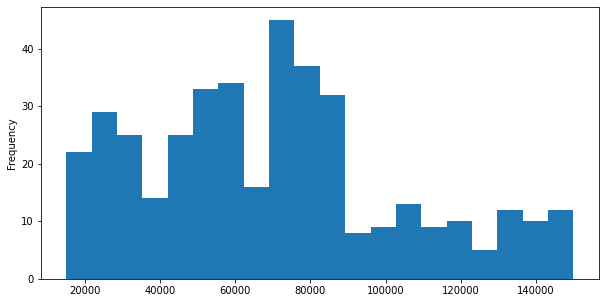

In [9]:
suv_data["EstimatedSalary"].plot.hist(bins=20, figsize=(10,5))

In [10]:
suv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


#  Data Wrangling

In [11]:
suv_data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [12]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:>

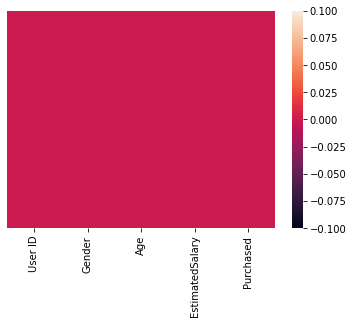

In [13]:
sns.heatmap(suv_data.isnull(), yticklabels=False)

<AxesSubplot:xlabel='Purchased', ylabel='Age'>

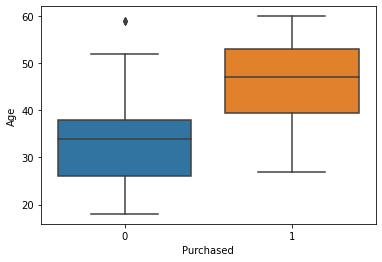

In [14]:
sns.boxplot(x="Purchased", y="Age", data=suv_data)

In [15]:
suv_data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [16]:
suv_data.drop(["User ID"],axis=1,inplace=True)

In [17]:
suv_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [18]:
sex = pd.get_dummies(suv_data["Gender"], drop_first=True)

In [19]:
sex

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [20]:
sex.head(2)

,Male
0,1
1,1


In [21]:
suv_data=pd.concat([suv_data,sex],axis=1)

In [22]:
suv_data

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [23]:
suv_data.drop(["Gender"], axis=1, inplace=True)

In [24]:
suv_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


#  Train Data

In [29]:
# Train the data
X = suv_data.drop(["Purchased", "Male"], axis=1) # Independent Variable
y = suv_data["Purchased"] # Dependent Variable
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
logmodel = LogisticRegression(max_iter=100)

In [68]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [69]:
predictions = logmodel.predict(X_test)

In [70]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.97      0.90        63\n           1       0.93      0.68      0.78        37\n\n    accuracy                           0.86       100\n   macro avg       0.88      0.82      0.84       100\nweighted avg       0.87      0.86      0.85       100\n'

In [71]:
confusion_matrix(y_test,predictions)

array([[61,  2],
       [12, 25]], dtype=int64)

In [72]:
accuracy_score(y_test,predictions)

0.86